In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('shootings.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [36]:
df = df.drop('id', 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     4895 non-null   object 
 1   date                     4895 non-null   object 
 2   manner_of_death          4895 non-null   object 
 3   armed                    4895 non-null   object 
 4   age                      4895 non-null   float64
 5   gender                   4895 non-null   object 
 6   race                     4895 non-null   object 
 7   city                     4895 non-null   object 
 8   state                    4895 non-null   object 
 9   signs_of_mental_illness  4895 non-null   bool   
 10  threat_level             4895 non-null   object 
 11  flee                     4895 non-null   object 
 12  body_camera              4895 non-null   bool   
 13  arms_category            4895 non-null   object 
dtypes: bool(2), float64(1), 

In [37]:
df.describe()

,age
count,4895.000000
mean,36.549750
std,12.694348
min,6.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,91.000000


In [38]:
df.isna().sum()

name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [39]:
df['year'] = pd.to_datetime(df['date']).dt.year
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,2020


In [40]:
df2 = df[100:201]
df2

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
100,Brian Fritze,2015-02-10,shot,gun,45.0,M,White,New Castle,CO,True,attack,Car,False,Guns,2015
101,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,Hispanic,Pasco,WA,True,other,Foot,False,Unarmed,2015
102,Phillip Watkins,2015-02-11,shot,knife,23.0,M,Black,San Jose,CA,True,other,Not fleeing,False,Sharp objects,2015
103,Fletcher Ray Stewart,2015-02-11,shot,toy weapon,46.0,M,White,Dadeville,AL,True,attack,Foot,True,Other unusual objects,2015
104,Jonathan Larry Harden,2015-02-13,shot,unknown,23.0,M,White,San Bernardino,CA,False,attack,Car,False,Unknown,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Andrew Charles Shipley,2015-03-17,shot,gun,49.0,M,White,Medford,OR,True,attack,Not fleeing,False,Guns,2015
197,Declan Owen,2015-03-17,shot,gun,24.0,M,White,Dublin,NC,False,attack,Foot,False,Guns,2015
198,Alice Brown,2015-03-17,shot,unknown,24.0,F,White,San Francisco,CA,True,other,Not fleeing,False,Unknown,2015
199,Eugene Smith,2015-03-17,shot,gun,20.0,M,White,Onalaska,TX,True,attack,Not fleeing,False,Guns,2015


In [41]:
df2.T

,100,101,102,103,104,105,106,107,108,109,...,191,192,193,194,195,196,197,198,199,200
name,Brian Fritze,Antonio Zambrano-Montes,Phillip Watkins,Fletcher Ray Stewart,Jonathan Larry Harden,Andres Lara-Rodriguez,Richard Carlin,Matthew D. Belk,Daniel Mejia,Jason C. Hendrix,...,Aaron Siler,Richard Castilleja,Troy Ray Boyd,Justin Tolkinen,William Dean Poole,Andrew Charles Shipley,Declan Owen,Alice Brown,Eugene Smith,Roberto Leon
date,2015-02-10,2015-02-10,2015-02-11,2015-02-11,2015-02-13,2015-02-13,2015-02-13,2015-02-13,2015-02-13,2015-02-14,...,2015-03-14,2015-03-14,2015-03-15,2015-03-16,2015-03-16,2015-03-17,2015-03-17,2015-03-17,2015-03-17,2015-03-17
manner_of_death,shot,shot and Tasered,shot,shot,shot,shot,shot,shot,shot,shot,...,shot,shot,shot,shot,shot,shot,shot,shot,shot,shot
armed,gun,unarmed,knife,toy weapon,unknown,gun,unarmed,gun,knife,gun,...,gun,gun,machete,gun,gun,gun,gun,unknown,gun,unarmed
age,45,35,23,46,23,21,35,27,37,16,...,26,29,27,28,52,49,24,24,20,22
gender,M,M,M,M,M,M,M,M,M,M,...,M,M,M,M,M,M,M,F,M,M
race,White,Hispanic,Black,White,White,Hispanic,Hispanic,White,Hispanic,White,...,White,Hispanic,White,White,White,White,White,White,White,Hispanic
city,New Castle,Pasco,San Jose,Dadeville,San Bernardino,Kansas City,Reading,McLemoresville,San Manuel,Essex,...,Kenosha,San Antonio,Ruth,St. Paul,Gastonia,Medford,Dublin,San Francisco,Onalaska,Sacramento
state,CO,WA,CA,AL,CA,KS,PA,TN,AZ,MD,...,WI,TX,MS,MN,NC,OR,NC,CA,TX,CA
signs_of_mental_illness,True,True,True,True,False,False,False,False,True,True,...,False,True,False,True,True,True,False,True,True,False


In [42]:
df3 = df.sort_values(['race', 'gender', 'age'])[:21]
df3

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
3620,Tori Kaneshiro,2018-12-11,shot,gun,30.0,F,Asian,Pahoa,HI,False,attack,Not fleeing,False,Guns,2018
3123,Shukri Ali Said,2018-04-28,shot,knife,36.0,F,Asian,Johns Creek,GA,True,other,Not fleeing,False,Sharp objects,2018
1907,Sinuon Pream,2017-01-15,shot and Tasered,knife,37.0,F,Asian,Long Beach,CA,True,other,Not fleeing,False,Sharp objects,2017
3947,Shawna Widemann,2019-04-29,shot,hammer,49.0,F,Asian,Welch,WV,False,other,Not fleeing,False,Blunt instruments,2019
1782,Luke Smith,2016-11-19,shot and Tasered,knife,15.0,M,Asian,Watsonville,CA,False,other,Foot,True,Sharp objects,2016
3789,Clayton Joseph,2019-02-19,shot,knife,16.0,M,Asian,Vancouver,WA,False,attack,Not fleeing,False,Sharp objects,2019
4636,Daelyn Polu,2020-02-15,shot,gun,16.0,M,Asian,Achorage,AK,False,attack,Not fleeing,False,Guns,2020
1519,Limichael Shine,2016-07-31,shot,knife,18.0,M,Asian,Manchester,NJ,True,other,Not fleeing,True,Sharp objects,2016
2268,Naway Willy,2017-06-02,shot,gun,18.0,M,Asian,Tulsa,OK,False,attack,Foot,False,Guns,2017
3063,Nathaniel Prasad,2018-04-05,shot,gun,18.0,M,Asian,Fremont,CA,False,attack,Foot,False,Guns,2018


In [43]:
df4 = df3[['race','gender','age']]
df4

,race,gender,age
3620,Asian,F,30.0
3123,Asian,F,36.0
1907,Asian,F,37.0
3947,Asian,F,49.0
1782,Asian,M,15.0
3789,Asian,M,16.0
4636,Asian,M,16.0
1519,Asian,M,18.0
2268,Asian,M,18.0
3063,Asian,M,18.0


In [44]:
armed = df['arms_category'].value_counts()
fig = px.bar(x = armed.index, y = armed, title = 'Arms Category Used By Person')
fig['layout'].update(height = 500, width = 500)
fig.update_layout(xaxis_title = 'Arms Category', yaxis_title = 'Count')
fig.show()

In [45]:
fig = go.Figure()

fig.add_trace(go.Histogram(x = df['age'],
                          xbins = dict(
                          start = 15,
                          end = 74,
                          size = 1),
                          opacity = 1))

fig.update_layout(title_text = 'Age Distribution',
                 xaxis_title = 'Age',
                 yaxis_title = 'Count',
                 bargap = 0.05,
                 xaxis = {'showgrid':False},
                 yaxis = {'showgrid':False},
                 template ='seaborn',
                 height = 300,
                 width = 600)
fig.show()

In [46]:
city = df['city'].value_counts().head(10)
fig = px.bar(x = city.index, y = city, title = 'Top 10 Cities', height = 400, width = 500)
fig.update_layout(xaxis_title = 'City', yaxis_title = 'Count')
fig.update_traces(marker_color = ['pink', 'plum', 'mediumorchid', 'darkviolet', 'mediumpurple', 'purple', 'indigo', 'thistle', 'mediumvioletred', 'blueviolet'])
fig.show()

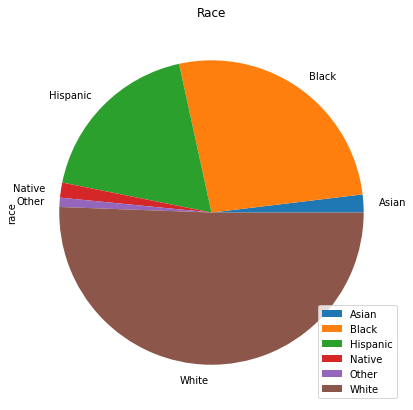

In [47]:
counts = df['race'].value_counts().sort_index()
counts.plot(kind = 'pie', title = 'Race', figsize = (9, 7))
plt.legend(loc = 'lower right')
plt.show()

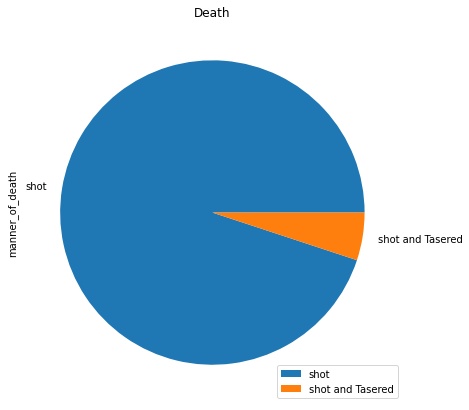

In [48]:
counts = df['manner_of_death'].value_counts().sort_index()
counts.plot(kind = 'pie', title = 'Death', figsize = (9, 7))
plt.legend(loc = 'lower right')
plt.show()

Text(0.5, 0, 'Count')

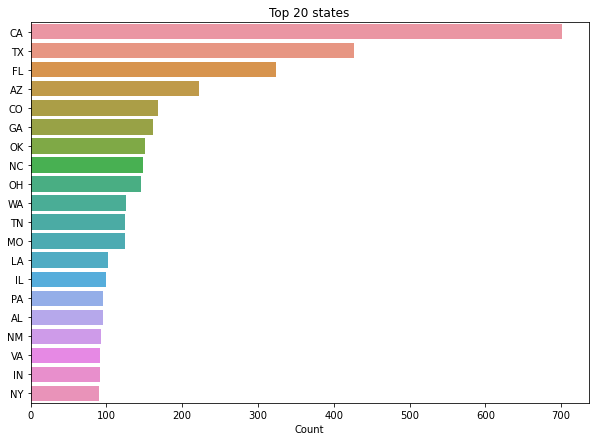

In [49]:
import seaborn as sns
plt.figure(figsize = (10,7))
chains = df['state'].value_counts()[:20]
sns.barplot(x = chains, y = chains.index)
plt.title('Top 20 states')
plt.xlabel('Count')

In [50]:
fig = px.histogram(df['state'], color = df['race'], title = 'State vs Race Distribution', height = 400, width = 1000)
fig.update_layout(xaxis_title = 'State', yaxis_title = 'Count')
fig.show()

<AxesSubplot:xlabel='race', ylabel='age'>

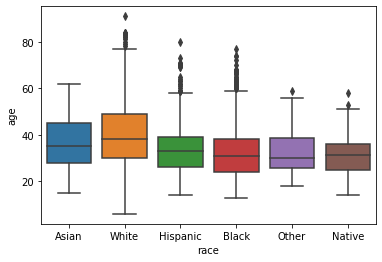

In [51]:
sns.boxplot(x = 'race', y = 'age', data = df)

In [52]:
pd.pivot_table(df, values = ['name', 'age'], index = ['state', 'gender'], aggfunc = {'name': 'count', 'age': [min, max, np.mean]})

age                        name
                    max       mean        min count
state gender                                       
AK    F       38.000000  35.000000  32.000000     2
      M       59.000000  32.676471  16.000000    34
AL    F       41.000000  36.714286  32.000000     7
      M       77.000000  40.309498  16.000000    88
AR    F       37.117931  37.117931  37.117931     1
...                 ...        ...        ...   ...
WI    M       77.000000  37.127792  14.000000    87
WV    F       49.000000  47.000000  45.000000     2
      M       82.000000  40.664451  21.000000    44
WY    F       39.000000  39.000000  39.000000     1
      M       58.000000  40.000000  21.000000    12

[92 rows x 4 columns]

In [53]:
pd.pivot_table(df, values = ['name', 'age'], index = ['race', 'gender'], aggfunc = {'name': 'count', 'age': [min, max, np.mean]})

age                   name
                  max       mean   min count
race     gender                             
Asian    F       49.0  38.000000  30.0     4
         M       62.0  36.497032  15.0    89
Black    F       72.0  34.808511  20.0    47
         M       77.0  32.465092  13.0  1251
Hispanic F       54.0  31.542997  16.0    26
         M       80.0  33.747389  14.0   876
Native   F       38.0  31.200000  23.0     5
         M       58.0  31.768739  14.0    73
Other    F       50.0  31.250000  22.0     4
         M       59.0  33.229953  18.0    44
White    F       84.0  39.184691  12.0   136
         M       91.0  39.951613   6.0  2340

In [54]:
pd.pivot_table(df, values = ['age', 'name'], index = ['state', 'city'], aggfunc = {'age': [np.mean], 'name': ['count']})

age  name
                         mean count
state city                         
AK    Achorage      16.000000     1
      Anchor Point  32.000000     1
      Anchorage     31.142857     7
      Barrow        36.000000     1
      Big Lake      35.000000     1
...                       ...   ...
WY    Cheyenne      36.000000     2
      Douglas       45.500000     2
      Gillette      39.000000     1
      Laramie       43.500000     2
      Riverton      58.000000     1

[2565 rows x 2 columns]